Processing chunk from 0 to 100...
Chunk from 0 to 100 processed.
All chunks processed successfully.
Processing chunk from 0 to 200...
Chunk from 0 to 200 processed.
All chunks processed successfully.
Processing chunk from 0 to 300...
Chunk from 0 to 300 processed.
All chunks processed successfully.
Processing chunk from 0 to 400...
Chunk from 0 to 400 processed.
All chunks processed successfully.
Processing chunk from 0 to 500...
Chunk from 0 to 500 processed.
All chunks processed successfully.
Processing chunk from 0 to 600...
Chunk from 0 to 600 processed.
All chunks processed successfully.
Processing chunk from 0 to 700...
Chunk from 0 to 700 processed.
All chunks processed successfully.
Processing chunk from 0 to 800...
Chunk from 0 to 800 processed.
All chunks processed successfully.
Processing chunk from 0 to 900...
Chunk from 0 to 900 processed.
All chunks processed successfully.
Processing chunk from 0 to 1000...
Chunk from 0 to 1000 processed.
All chunks processed successfully

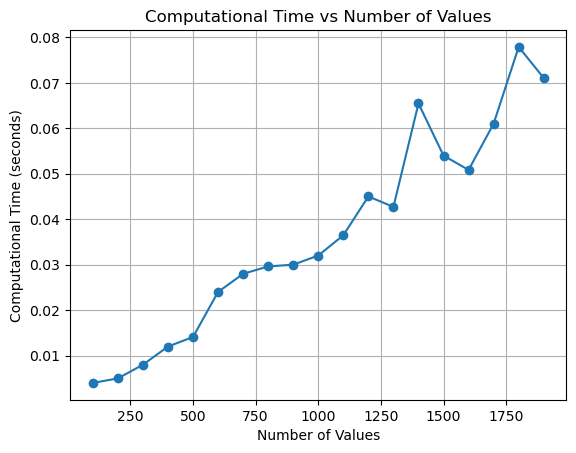

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def rotate_and_operate_chunked(vec1, vec2, chunk_size=10000, verbose=False):
    n = len(vec1)
    result_vector = np.empty(n * n, dtype='float32')  # Use float32 to reduce memory usage

    for start in range(0, n, chunk_size):
        end = min(start + chunk_size, n)
        chunk_length = end - start
        temp_result = np.empty((chunk_length, n), dtype='float32')

        if verbose:
            print(f"Processing chunk from {start} to {end}...")

        for i in range(chunk_length):
            rotated_vec1 = np.roll(vec1, start + i)
            temp_result[i, :] = rotated_vec1 - vec2

        result_vector[start*n:(start + chunk_length)*n] = temp_result.flatten()

        if verbose:
            print(f"Chunk from {start} to {end} processed.")

    if verbose:
        print("All chunks processed successfully.")

    return result_vector

csv_file = "DC.csv"
values_range = range(100, 2000, 100)

times = []
results = []

for n in values_range:
    df = pd.read_csv(csv_file, usecols=[0, 1], nrows=n)
    vec1 = df.iloc[:, 0].values.astype('float32')
    vec2 = df.iloc[:, 1].values.astype('float32')

    start_time = time.time()
    result_vector = rotate_and_operate_chunked(vec1, vec2, verbose=True)
    end_time = time.time()

    times.append(end_time - start_time)
    results.append(result_vector[:10])  # Display only first 10 elements for verification

# Plot the graph
plt.plot(values_range, times, marker='o')
plt.xlabel('Number of Values')
plt.ylabel('Computational Time (seconds)')
plt.title('Computational Time vs Number of Values')
plt.grid(True)
plt.show()


In [6]:
print(result_vector.shape)

(100000000,)


In [7]:
print(result_vector)

[-1.5000391e-04  6.2899501e-04  2.8918602e-04 ... -3.6936951e-01
 -3.6958897e-01 -1.8137733e+00]


In [7]:
import numpy as np

# Define small vectors and parameters
vec1 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
vec2 = np.array([8, 7, 6, 5, 4, 3, 2, 1])
n = len(vec1)
chunk_size = 2  # Small chunk size for easy demonstration

# Massive Loop
result_vector_massive = np.empty(n * n, dtype='float32')
for i in range(n):
    rotated_vec1 = np.roll(vec1, i)
    index = i * n
    result_vector_massive[index:index + n] = rotated_vec1 - vec2

print("Massive Loop Result:")
print(result_vector_massive)

# Chunked Loop
result_vector_chunked = np.empty(n * n, dtype='float32')
for start in range(0, n, chunk_size):
    end = min(start + chunk_size, n)
    for i in range(start, end):
        rotated_vec1 = np.roll(vec1, i)
        index = i * n
        result_vector_chunked[index:index + n] = rotated_vec1 - vec2

print("Chunked Loop Result:")
print(result_vector_chunked)

# Verify that both methods produce the same results
assert np.array_equal(result_vector_massive, result_vector_chunked), "The results differ"
print("The results are identical.")


Massive Loop Result:
[-7. -5. -3. -1.  1.  3.  5.  7.  0. -6. -4. -2.  0.  2.  4.  6. -1.  1.
 -5. -3. -1.  1.  3.  5. -2.  0.  2. -4. -2.  0.  2.  4. -3. -1.  1.  3.
 -3. -1.  1.  3. -4. -2.  0.  2.  4. -2.  0.  2. -5. -3. -1.  1.  3.  5.
 -1.  1. -6. -4. -2.  0.  2.  4.  6.  0.]
Chunked Loop Result:
[-7. -5. -3. -1.  1.  3.  5.  7.  0. -6. -4. -2.  0.  2.  4.  6. -1.  1.
 -5. -3. -1.  1.  3.  5. -2.  0.  2. -4. -2.  0.  2.  4. -3. -1.  1.  3.
 -3. -1.  1.  3. -4. -2.  0.  2.  4. -2.  0.  2. -5. -3. -1.  1.  3.  5.
 -1.  1. -6. -4. -2.  0.  2.  4.  6.  0.]
The results are identical.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def rotate_and_operate_chunked(vec1, vec2, chunk_size=10000, verbose=False):
    n = len(vec1)
    result_vector = np.empty(n * n, dtype='float32')

    for start in range(0, n, chunk_size):
        end = min(start + chunk_size, n)
        chunk_length = end - start
        temp_result = np.empty((chunk_length, n), dtype='float32')

        if verbose and start % (5 * chunk_size) == 0:  # Reduces the frequency of verbose output
            print(f"Processing chunk from {start} to {end}...")

        for i in range(chunk_length):
            rotated_vec1 = np.roll(vec1, start + i)
            temp_result[i, :] = rotated_vec1 - vec2

        result_vector[start*n:(start + chunk_length)*n] = temp_result.flatten()

        if verbose and start % (5 * chunk_size) == 0:
            print(f"Chunk from {start} to {end} processed.")

    if verbose:
        print("All chunks processed successfully.")

    return result_vector
# Take number of rows from the user
num_rows = int(input("Please enter the number of rows to process: "))

csv_file = "DC.csv"
times = []
results = []

df = pd.read_csv(csv_file, usecols=[0, 1], nrows=num_rows)
vec1 = df.iloc[:, 0].values.astype('float32')
vec2 = df.iloc[:, 1].values.astype('float32')

start_time = time.time()
result_vector = rotate_and_operate_chunked(vec1, vec2, verbose=True)
end_time = time.time()

times.append(end_time - start_time)
results.append(result_vector[:10])  # Display only first 10 elements for verification

# Sort the result_vector
sorted_vector = np.sort(result_vector)

# Export to CSV
pd.DataFrame(sorted_vector, columns=['Sorted Results']).to_csv('sorted_results.csv', index=False)

print("Processing complete. CSV file has been written.")


Please enter the number of rows to process:  2500


Processing chunk from 0 to 2500...
Chunk from 0 to 2500 processed.
All chunks processed successfully.
Processing complete. CSV file has been written.
